Tìm segment có chỉ số tốt nhất

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/transaction_history.csv', index_col=0)
df

,transaction_id,transaction_datetime,customer_id,product_id,product_lvl1,product_lvl2,product_lvl3,product_lvl4,brand,price,...,rating,num_sold,quantity,unit_price,total_amount,payment_id,promotion_id,transaction_status,transaction_type,store_id
0,0.0,2013-01-01 00:00:00,0,123,Siêu thị,Thực phẩm đông lạnh,Hải sản,Cá basa đông lạnh,Frozen Seafood,80000,...,2.4,1144,0,80000,0,0.0,NaN,Đã tiếp nhận,Hoàn tiền,8366
1,1.0,2020-07-22 20:43:44,1,37,Giày dép và Phụ kiện,Giày cao gót,Giày cao gót nữ,Giày cao gót nữ mũi nhọn,Jimmy Choo,7599000,...,NaN,1738,6,7599000,45594000,1.0,NaN,Đã xác nhận,Thẻ tín dụng,8065
2,2.0,2022-12-16 03:40:11,2,67,Siêu thị,Thực phẩm đóng hộp,Nước mắm,Nước mắm Phú Quốc,Phu Quoc Fish Sauce,45000,...,4.6,983,0,45000,0,2.0,NaN,Đã tiếp nhận,Mua hàng,8917
3,3.0,2022-12-16 03:40:11,2,31,Thời trang Nam/Nữ,Đầm,Đầm nữ,Đầm nữ dự tiệc,H&M,790000,...,4.6,1419,1,790000,790000,2.0,NaN,Đã hủy,Mua hàng,8596
4,4.0,2022-12-16 03:40:11,2,12,Phụ kiện điện thoại,Ốp lưng điện thoại,Ốp lưng điện thoại iPhone,Ốp lưng điện thoại iPhone Silicone,Apple,490000,...,4.7,397,0,490000,0,2.0,NaN,Đã giao hàng,Thẻ ghi nợ,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19163,17542.0,2022-12-19 15:21:43,9998,87,Siêu thị,Đồ uống,Bia,Bia Tiger,Tiger Beer,25000,...,NaN,1517,2,25000,50000,10942.0,19163.0,Đã từ chối,Thẻ ghi nợ,8217
19164,17543.0,2022-12-29 03:49:30,9999,103,Laptop và Máy tính,Laptop,MacBook,MacBook Air,Apple,27990000,...,4.7,687,0,27990000,0,10943.0,NaN,Đã giao hàng,Mua hàng,8375
19165,17544.0,2022-03-04 23:37:00,10000,117,Đèn trang trí và Chiếu sáng,Đèn bàn,Đèn bàn đọc sách,Đèn bàn đọc sách LED,Philips,599000,...,4.7,1197,0,599000,0,10944.0,19165.0,Đã tiếp nhận,Thanh toán,8808
19166,17544.0,2022-03-04 23:37:00,10000,63,Đồ ăn,Thực phẩm đóng gói,Kẹo,Kẹo sữa dừa,Orion,12000,...,4.6,1060,13,12000,156000,10945.0,NaN,Đang xử lý,Thẻ tín dụng,8248


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19168 entries, 0 to 19167
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_id        18735 non-null  float64
 1   transaction_datetime  18349 non-null  object 
 2   customer_id           19168 non-null  int64  
 3   product_id            19168 non-null  int64  
 4   product_lvl1          19168 non-null  object 
 5   product_lvl2          19168 non-null  object 
 6   product_lvl3          19168 non-null  object 
 7   product_lvl4          19168 non-null  object 
 8   brand                 19168 non-null  object 
 9   price                 19168 non-null  int64  
 10  description           19168 non-null  object 
 11  rating                17607 non-null  float64
 12  num_sold              19168 non-null  int64  
 13  quantity              19168 non-null  int64  
 14  unit_price            19168 non-null  int64  
 15  total_amount          19

In [4]:
df.groupby(['product_lvl1','product_lvl2','product_lvl3'])['product_lvl4'].nunique()

product_lvl1          product_lvl2         product_lvl3           
Giày dép và Phụ kiện  Giày cao gót         Giày cao gót nữ            2
                      Giày thể thao        Giày thể thao nam          1
                                           Giày thể thao unisex       1
Laptop và Máy tính    Laptop               MacBook                    2
                                           ThinkPad                   1
                                                                     ..
Đồ ăn                 Thực phẩm đóng hộp   Thịt xông khói             1
                      Thực phẩm đông lạnh  Hải sản                    1
Đồng hồ               Đồng hồ nam          Đồng hồ nam dây da         2
                      Đồng hồ nữ           Đồng hồ nữ dây da          1
                                           Đồng hồ nữ dây kim loại    1
Name: product_lvl4, Length: 131, dtype: int64

Chúng ta sẽ xem các category sản phẩm mà công ty đang bán

# Recommendation System

<img src="./static/CP.jpg" style="width: 800px"/>

Về cơ bản có 2 loại Recommendation System:
- Content-based Recommendation: tìm kiếm sự tương đồng của sản phẩm mà giới thiệu
- Collaborative Filtering Recommendation: tìm kiếm khách hàng tương đồng, và giới thiệu sản phẩm mà KH trước đã mua

Nhìn chung Collaborative Filtering được ưu chuộng sử dụng hơn và hiệu quả hơn so với Content-Based Recommendation. Chúng ta sẽ sử dụng Collaborative Filtering liên quan đến đồ công nghệ

## User Similarity

In [5]:
df['product_lvl1'].nunique()

24

In [6]:
df['product_lvl1'].value_counts()

product_lvl1
Siêu thị đồ ăn                     2681
Siêu thị                           2614
Sách                               1991
Rau củ                             1326
Thương mại điện tử                 1307
Tiêu dùng nhanh                    1292
Đồ ăn                               613
Quần áo                             610
Laptop và Máy tính                  548
Máy ảnh và Máy quay phim            537
Điện gia dụng                       534
Đồng hồ                             534
Thể thao và Dã ngoại                525
Điện thoại di động                  518
Thời trang Nam/Nữ                   517
Giày dép và Phụ kiện                510
Đồ chơi và Trò chơi                 483
Đèn trang trí và Chiếu sáng         477
Thiết bị điện tử                    300
Phụ kiện điện thoại                 275
Máy lọc không khí và Máy tạo ẩm     264
Túi xách và Ví                      241
Máy giặt và Máy sấy                 238
Làm đẹp và Chăm sóc cá nhân         233
Name: count, dtype: int64

Explore các product

In [7]:
df.loc[df['product_lvl1']=='Siêu thị đồ ăn'].head()

,transaction_id,transaction_datetime,customer_id,product_id,product_lvl1,product_lvl2,product_lvl3,product_lvl4,brand,price,...,rating,num_sold,quantity,unit_price,total_amount,payment_id,promotion_id,transaction_status,transaction_type,store_id
6,6.0,2022-12-16 03:40:11,2,85,Siêu thị đồ ăn,Thực phẩm đông lạnh,Thịt viên,Thịt viên xúc xích,Vietnamese Delights,45000,...,2.0,234,0,45000,0,2.0,6.0,Đang xử lý,Thanh toán,8874
43,42.0,2019-09-27 18:53:10,20,36,Siêu thị đồ ăn,Thực phẩm đóng hộp,Đậu hũ,Đậu hũ hấp,Tofu Brand,20000,...,3.2,256,2,20000,40000,19.0,43.0,Đã tiếp nhận,Mua hàng,8819
51,50.0,2019-09-27 18:53:10,20,127,Siêu thị đồ ăn,Thực phẩm đóng gói,Mì gói,Mì gói hương gà,Nissin,8000,...,4.7,519,5,8000,40000,19.0,51.0,Đã giao hàng,Mua hàng,8679
53,52.0,2022-03-08 19:28:51,22,90,Siêu thị đồ ăn,Thực phẩm tươi sống,Rau cải,Rau cải xanh,Farm Fresh,15000,...,4.7,287,0,15000,0,21.0,NaN,Đã giao hàng,Thanh toán trực tuyến,8169
59,57.0,2020-02-20 15:26:19,28,16,Siêu thị đồ ăn,Thực phẩm đông lạnh,Hải sản,Cá hồi tươi,Fresh Seafood,70000,...,3.8,1205,5,70000,350000,26.0,59.0,Đang xử lý,Thẻ ghi nợ,8478


In [8]:
df.loc[df['product_lvl1']=='Siêu thị'].head()

,transaction_id,transaction_datetime,customer_id,product_id,product_lvl1,product_lvl2,product_lvl3,product_lvl4,brand,price,...,rating,num_sold,quantity,unit_price,total_amount,payment_id,promotion_id,transaction_status,transaction_type,store_id
0,0.0,2013-01-01 00:00:00,0,123,Siêu thị,Thực phẩm đông lạnh,Hải sản,Cá basa đông lạnh,Frozen Seafood,80000,...,2.4,1144,0,80000,0,0.0,NaN,Đã tiếp nhận,Hoàn tiền,8366
2,2.0,2022-12-16 03:40:11,2,67,Siêu thị,Thực phẩm đóng hộp,Nước mắm,Nước mắm Phú Quốc,Phu Quoc Fish Sauce,45000,...,4.6,983,0,45000,0,2.0,NaN,Đã tiếp nhận,Mua hàng,8917
12,12.0,2021-11-15 22:06:45,4,44,Siêu thị,Thực phẩm đóng gói,Gạo,Gạo thơm,Premium Rice,45000,...,4.9,957,4,45000,180000,4.0,12.0,Đang xử lý,Mua hàng,8248
14,14.0,2021-11-15 22:06:45,4,87,Siêu thị,Đồ uống,Bia,Bia Tiger,Tiger Beer,25000,...,NaN,1517,0,25000,0,4.0,NaN,Đã hủy,Hoàn tiền,8006
18,18.0,2021-11-15 22:06:45,4,97,Siêu thị,Đồ uống,Bia,Bia Tiger,Tiger Beer,25000,...,4.8,183,2,25000,50000,4.0,18.0,Đã giao hàng,Hoàn tiền,8898


In [9]:
df.loc[df['product_lvl1']=='Tiêu dùng nhanh'].head(10)

,transaction_id,transaction_datetime,customer_id,product_id,product_lvl1,product_lvl2,product_lvl3,product_lvl4,brand,price,...,rating,num_sold,quantity,unit_price,total_amount,payment_id,promotion_id,transaction_status,transaction_type,store_id
47,46.0,2019-09-27 18:53:10,20,40,Tiêu dùng nhanh,Đồ ăn nhanh,Bánh mỳ,Bánh mỳ thịt nguội,Bakery Delights,25000,...,5.0,1784,7,25000,175000,19.0,NaN,Đã hủy,Thanh toán trực tuyến,8664
64,62.0,2022-02-12 21:29:43,30,113,Tiêu dùng nhanh,Đồ ăn nhanh,Pizza,Pizza phô mai,Pizza Express,65000,...,3.0,1631,1,65000,65000,27.0,NaN,Đã hủy,Thanh toán,8689
99,91.0,2021-01-20 09:02:07,44,2,Tiêu dùng nhanh,Đồ ăn nhanh,Mỳ tôm,Mỳ tôm hải sản,Instant Noodles,10000,...,4.6,290,7,10000,70000,46.0,99.0,Đã hủy,Thanh toán,8978
101,93.0,2022-08-18 11:50:53,46,25,Tiêu dùng nhanh,Đồ ăn nhẹ,Kẹo,Kẹo caramen,Candy World,8000,...,5.0,213,1,8000,8000,48.0,101.0,Đang xử lý,Mua hàng,8849
129,117.0,2022-02-04 07:41:24,62,25,Tiêu dùng nhanh,Đồ ăn nhẹ,Kẹo,Kẹo caramen,Candy World,8000,...,5.0,213,0,8000,0,66.0,NaN,Đã giao hàng,Hoàn tiền,8627
133,121.0,2022-07-13 08:10:40,64,93,Tiêu dùng nhanh,Đồ uống,Trà sữa,Trà sữa trân châu đường đen,Milk Tea House,45000,...,4.6,788,2,45000,90000,68.0,133.0,Đang xử lý,Thanh toán,8800
142,130.0,2022-10-19 11:35:12,68,2,Tiêu dùng nhanh,Đồ ăn nhanh,Mỳ tôm,Mỳ tôm hải sản,Instant Noodles,10000,...,4.6,290,16,10000,160000,72.0,NaN,Đã giao hàng,Mua hàng,8035
178,166.0,2022-09-05 11:28:43,96,120,Tiêu dùng nhanh,Đồ ăn nhẹ,Bánh quy,Bánh quy socola,Sweet Treats,15000,...,4.9,761,0,15000,0,99.0,NaN,Đã giao hàng,Hoàn tiền,8286
204,192.0,2020-06-29 03:09:21,114,120,Tiêu dùng nhanh,Đồ ăn nhẹ,Bánh quy,Bánh quy socola,Sweet Treats,15000,...,4.9,761,4,15000,60000,117.0,204.0,Đang xử lý,Thẻ ghi nợ,8055
211,199.0,2022-11-28 05:23:09,118,80,Tiêu dùng nhanh,Đồ ăn nhanh,Hamburger,Hamburger bò,Fast Food Co.,45000,...,3.0,1513,12,45000,540000,121.0,211.0,Thành công,Thẻ ghi nợ,8566


In [10]:
df.loc[df['product_lvl1']=='Điện gia dụng'].head(10)

,transaction_id,transaction_datetime,customer_id,product_id,product_lvl1,product_lvl2,product_lvl3,product_lvl4,brand,price,...,rating,num_sold,quantity,unit_price,total_amount,payment_id,promotion_id,transaction_status,transaction_type,store_id
16,16.0,2021-11-15 22:06:45,4,128,Điện gia dụng,Tủ lạnh,Tủ lạnh 2 cửa,Tủ lạnh 2 cửa Samsung,Samsung,8990000,...,4.7,178,2,8990000,17980000,4.0,NaN,Đã hủy,Thẻ ghi nợ,8457
141,129.0,2022-04-08 20:12:19,67,33,Điện gia dụng,Lò vi sóng,Lò vi sóng nướng,Lò vi sóng nướng Panasonic,Panasonic,3690000,...,4.6,99,0,3690000,0,71.0,NaN,Đã hoàn trả,Thẻ ghi nợ,8905
165,153.0,2022-04-24 22:41:46,88,128,Điện gia dụng,Tủ lạnh,Tủ lạnh 2 cửa,Tủ lạnh 2 cửa Samsung,Samsung,8990000,...,4.7,178,0,8990000,0,91.0,NaN,Đang xử lý,Thẻ tín dụng,8893
205,193.0,2020-11-14 13:19:08,115,121,Điện gia dụng,Máy lọc không khí,Máy lọc không khí Sharp,Máy lọc không khí Sharp KI-A60E-W,Sharp,2899000,...,4.6,1352,2,2899000,5798000,118.0,NaN,Thành công,Thanh toán,8661
279,258.0,2021-04-12 20:31:26,151,56,Điện gia dụng,Tivi,Tivi 4K,Tivi 4K 55 inch,LG,8990000,...,4.7,1007,0,8990000,0,169.0,279.0,Đã xác nhận,Mua hàng,8072
334,306.0,2022-11-07 21:49:00,174,56,Điện gia dụng,Tivi,Tivi 4K,Tivi 4K 55 inch,LG,8990000,...,4.7,1007,1,8990000,8990000,199.0,NaN,Đã giao hàng,Thẻ tín dụng,8614
356,325.0,2021-05-17 22:22:37,180,56,Điện gia dụng,Tivi,Tivi 4K,Tivi 4K 55 inch,LG,8990000,...,4.7,1007,0,8990000,0,208.0,NaN,Đã hoàn trả,Mua hàng,8864
368,336.0,2021-09-13 18:35:27,190,56,Điện gia dụng,Tivi,Tivi 4K,Tivi 4K 55 inch,LG,8990000,...,4.7,1007,0,8990000,0,220.0,368.0,Thành công,Hoàn tiền,8186
373,340.0,2022-12-15 14:57:06,194,33,Điện gia dụng,Lò vi sóng,Lò vi sóng nướng,Lò vi sóng nướng Panasonic,Panasonic,3690000,...,4.6,99,6,3690000,22140000,225.0,NaN,Đã giao hàng,Hoàn tiền,8904
439,396.0,2019-06-12 06:21:31,239,33,Điện gia dụng,Lò vi sóng,Lò vi sóng nướng,Lò vi sóng nướng Panasonic,Panasonic,3690000,...,4.6,99,0,3690000,0,272.0,NaN,Thành công,Thanh toán,8167


In [11]:
df.loc[df['product_lvl1']=='Thể thao và Dã ngoại'].head(10)

,transaction_id,transaction_datetime,customer_id,product_id,product_lvl1,product_lvl2,product_lvl3,product_lvl4,brand,price,...,rating,num_sold,quantity,unit_price,total_amount,payment_id,promotion_id,transaction_status,transaction_type,store_id
7,7.0,2022-12-16 03:40:11,2,13,Thể thao và Dã ngoại,Balo leo núi,Balo leo núi phong cách,Balo leo núi The North Face,The North Face,1990000,...,4.8,854,1,1990000,1990000,2.0,7.0,Đã hoàn trả,Mua hàng,8331
24,23.0,2018-10-03 06:32:45,9,13,Thể thao và Dã ngoại,Balo leo núi,Balo leo núi phong cách,Balo leo núi The North Face,The North Face,1990000,...,4.8,854,3,1990000,5970000,8.0,NaN,Đang xử lý,Mua hàng,8260
26,25.0,2018-10-03 06:32:45,9,42,Thể thao và Dã ngoại,Gậy golf,Gậy golf nam,Gậy golf nam Callaway Epic Speed,Callaway,3499000,...,NaN,592,8,3499000,27992000,8.0,26.0,Thành công,Mua hàng,8731
33,32.0,2022-12-29 01:22:47,11,42,Thể thao và Dã ngoại,Gậy golf,Gậy golf nam,Gậy golf nam Callaway Epic Speed,Callaway,3499000,...,NaN,592,0,3499000,0,10.0,NaN,Đã hủy,Mua hàng,8702
54,53.0,2022-12-19 18:55:21,23,66,Thể thao và Dã ngoại,Xe đạp,Xe đạp địa hình,Xe đạp địa hình MTB Giant,Giant,17990000,...,5.0,188,15,17990000,269850000,22.0,54.0,Đã hủy,Thẻ ghi nợ,8547
72,68.0,2022-03-21 18:25:55,34,66,Thể thao và Dã ngoại,Xe đạp,Xe đạp địa hình,Xe đạp địa hình MTB Giant,Giant,17990000,...,5.0,188,2,17990000,35980000,32.0,NaN,Thành công,Thẻ ghi nợ,8099
120,112.0,2022-04-11 11:18:05,56,66,Thể thao và Dã ngoại,Xe đạp,Xe đạp địa hình,Xe đạp địa hình MTB Giant,Giant,17990000,...,5.0,188,7,17990000,125930000,58.0,120.0,Thành công,Mua hàng,8405
123,113.0,2019-06-20 15:26:55,57,131,Thể thao và Dã ngoại,Xe đạp đua,Xe đạp đua địa hình,Xe đạp đua địa hình Trek Procaliber,Trek,24990000,...,4.9,423,1,24990000,24990000,61.0,123.0,Đang xử lý,Thẻ tín dụng,8946
127,115.0,2022-03-09 12:47:45,60,42,Thể thao và Dã ngoại,Gậy golf,Gậy golf nam,Gậy golf nam Callaway Epic Speed,Callaway,3499000,...,NaN,592,0,3499000,0,64.0,NaN,Đã hủy,Hoàn tiền,8422
221,209.0,2022-11-04 03:38:23,119,13,Thể thao và Dã ngoại,Balo leo núi,Balo leo núi phong cách,Balo leo núi The North Face,The North Face,1990000,...,4.8,854,13,1990000,25870000,122.0,NaN,Đang xử lý,Thanh toán trực tuyến,8271


nhóm các product cùng loại lại với nhau

In [12]:

tech_lvl1 = [
    'Thương mại điện tử', 'Laptop và Máy tính', 'Máy ảnh và Máy quay phim', 'Điện gia dụng', 
    'Điện thoại di động', 'Thiết bị điện tử', 'Phụ kiện điện thoại', 'Máy lọc không khí và Máy tạo ẩm'
]
food_lv1 = [
    'Siêu thị đồ ăn', 'Siêu thị', 'Rau củ', 'Tiêu dùng nhanh','Đồ ăn'
]
hobby_lv1 = [
    'Sách', 'Thể thao và Dã ngoại', 'Đồ chơi và Trò chơi', 'Làm đẹp và Chăm sóc cá nhân'
]
fashion_lv1 = [
    'Quần áo', 'Đồng hồ', 'Thời trang Nam/Nữ', 'Giày dép và Phụ kiện', 'Túi xách và Ví'
]
household_lv1 = [
    'Đèn trang trí và Chiếu sáng', 'Máy giặt và Máy sấy'
]

In [13]:
df['product_lvl4'].nunique()

131

In [14]:
df[['customer_id', 'product_lvl4']]

,customer_id,product_lvl4
0,0,Cá basa đông lạnh
1,1,Giày cao gót nữ mũi nhọn
2,2,Nước mắm Phú Quốc
3,2,Đầm nữ dự tiệc
4,2,Ốp lưng điện thoại iPhone Silicone
...,...,...
19163,9998,Bia Tiger
19164,9999,MacBook Air
19165,10000,Đèn bàn đọc sách LED
19166,10000,Kẹo sữa dừa


Ở đây có rất nhiều các category thuộc phân khúc khác nhau, chúng ta sẽ chọn các category product-lvl1 thuộc đồ công nghệ

In [15]:
df_tech = df[df['product_lvl1'].isin(tech_lvl1)].copy()
df_tech

,transaction_id,transaction_datetime,customer_id,product_id,product_lvl1,product_lvl2,product_lvl3,product_lvl4,brand,price,...,rating,num_sold,quantity,unit_price,total_amount,payment_id,promotion_id,transaction_status,transaction_type,store_id
4,4.0,2022-12-16 03:40:11,2,12,Phụ kiện điện thoại,Ốp lưng điện thoại,Ốp lưng điện thoại iPhone,Ốp lưng điện thoại iPhone Silicone,Apple,490000,...,4.7,397,0,490000,0,2.0,NaN,Đã giao hàng,Thẻ ghi nợ,9000
8,8.0,2022-12-16 03:40:11,2,144,Máy ảnh và Máy quay phim,Máy quay phim,Máy quay phim 4K,Máy quay phim 4K Panasonic Lumix GH5,Panasonic,27990000,...,4.9,1232,4,27990000,111960000,2.0,8.0,Đã xác nhận,Mua hàng,8322
9,9.0,2022-12-16 03:40:11,2,92,Thương mại điện tử,Máy tính bảng,iPad,iPad Pro,Apple,20000000,...,4.9,1532,10,20000000,200000000,2.0,NaN,Đã giao hàng,Thẻ tín dụng,8178
16,16.0,2021-11-15 22:06:45,4,128,Điện gia dụng,Tủ lạnh,Tủ lạnh 2 cửa,Tủ lạnh 2 cửa Samsung,Samsung,8990000,...,4.7,178,2,8990000,17980000,4.0,NaN,Đã hủy,Thẻ ghi nợ,8457
20,20.0,2022-02-24 17:24:11,6,103,Laptop và Máy tính,Laptop,MacBook,MacBook Air,Apple,27990000,...,4.7,687,3,27990000,83970000,6.0,20.0,Đã tiếp nhận,Mua hàng,8582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19156,17535.0,2022-12-07 01:56:03,9992,103,Laptop và Máy tính,Laptop,MacBook,MacBook Air,Apple,27990000,...,4.7,687,10,27990000,279900000,10936.0,NaN,Thành công,Hoàn tiền,8029
19157,17536.0,2022-12-27 09:30:45,9993,33,Điện gia dụng,Lò vi sóng,Lò vi sóng nướng,Lò vi sóng nướng Panasonic,Panasonic,3690000,...,4.6,99,3,3690000,11070000,10937.0,19157.0,Đã hủy,Mua hàng,8227
19158,17537.0,2021-02-25 22:20:03,9994,128,Điện gia dụng,Tủ lạnh,Tủ lạnh 2 cửa,Tủ lạnh 2 cửa Samsung,Samsung,8990000,...,4.7,178,0,8990000,0,10938.0,NaN,Thành công,Mua hàng,8430
19161,17540.0,2022-07-18 16:44:09,9996,51,Máy ảnh và Máy quay phim,Máy ảnh du lịch,Máy ảnh du lịch Sony Alpha,Máy ảnh du lịch Sony Alpha a6400,Sony,17490000,...,3.9,1352,3,17490000,52470000,10940.0,NaN,Đã xác nhận,Thanh toán trực tuyến,8099


In [16]:
df_tech['customer_id'].nunique()

3061

Sản phẩm product_lvl4 là sản phẩm thật, và có 31 sp trong table

In [17]:
df_tech['product_lvl4'].nunique()

31

Thông tin vắn tắt lại mà chúng ta concern là

In [18]:
df_tech[['customer_id', 'product_lvl4']]

,customer_id,product_lvl4
4,2,Ốp lưng điện thoại iPhone Silicone
8,2,Máy quay phim 4K Panasonic Lumix GH5
9,2,iPad Pro
16,4,Tủ lạnh 2 cửa Samsung
20,6,MacBook Air
...,...,...
19156,9992,MacBook Air
19157,9993,Lò vi sóng nướng Panasonic
19158,9994,Tủ lạnh 2 cửa Samsung
19161,9996,Máy ảnh du lịch Sony Alpha a6400


Đếm xem có bao nhiêu giao dịch với mỗi KH mua sản phầm

In [19]:
x = df_tech[['customer_id', 'product_lvl4']].value_counts().to_frame().reset_index()
x

,customer_id,product_lvl4,count
0,9723,Samsung Galaxy S21,3
1,9053,Thiết bị chơi game Nintendo Switch OLED,2
2,6096,Máy quay phim 4K Panasonic Lumix GH5,2
3,275,Máy quay phim 4K Panasonic Lumix GH5,2
4,9205,Máy ảnh du lịch Sony Alpha a6400,2
...,...,...,...
4219,3348,Thiết bị chơi game Nintendo Switch OLED,1
4220,3349,iPhone 13 Pro,1
4221,3354,Pin dự phòng 10000mAh Anker,1
4222,3355,Đồng hồ thông minh Garmin Venu 2S,1


Tạo ra một bảng đánh dấu sản phẩm được mua hay không

In [20]:
x['count'] = 1
x

,customer_id,product_lvl4,count
0,9723,Samsung Galaxy S21,1
1,9053,Thiết bị chơi game Nintendo Switch OLED,1
2,6096,Máy quay phim 4K Panasonic Lumix GH5,1
3,275,Máy quay phim 4K Panasonic Lumix GH5,1
4,9205,Máy ảnh du lịch Sony Alpha a6400,1
...,...,...,...
4219,3348,Thiết bị chơi game Nintendo Switch OLED,1
4220,3349,iPhone 13 Pro,1
4221,3354,Pin dự phòng 10000mAh Anker,1
4222,3355,Đồng hồ thông minh Garmin Venu 2S,1


Bảng utility-matrix này sẽ giúp chúng ta có một cái nhìn rõ hơn về sự liên kết giữa sản phẩm và người dùng. Từ đó có thể tìm ra những khách hành có hành vi mua hàng giống nhau  
<img src="./static/matrix.png" style="width: 400px"/>

In [21]:
x = x.pivot_table(index='customer_id', columns='product_lvl4', values='count').fillna(0).astype(int)
# lấy ra danh sách customer id
list_customer_id = x.index.to_list()
x

product_lvl4,Canon EOS 90D,Galaxy S21,Galaxy Z Fold 3,Laptop Asus ZenBook,Laptop Dell XPS 13,Loa di động JBL Charge 4,Lò vi sóng nướng Panasonic,MacBook Air,MacBook Pro,Máy lọc không khí Sharp KI-A60E-W,...,Tai nghe không dây AirPods Pro,ThinkPad X1 Carbon,Thiết bị chơi game Nintendo Switch OLED,Tivi 4K 55 inch,Tủ lạnh 2 cửa Samsung,iPad Air,iPad Pro,iPhone 13 Pro,Đồng hồ thông minh Garmin Venu 2S,Ốp lưng điện thoại iPhone Silicone
customer_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9993,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Bảng utility matrix này miêu tả có 3061 user và 31 items, giá trị trong bảng là binary 0/1 tương ứng (ko mua hoặc mua hàng)

- Gần 0 là không tương đồng
- Gần 1 là tương đồng cực kỳ

Giống như correlation matrix, 

> Mình sẽ sử dụng độ đo đơn giản nhất cosine-similarity để tính ra sự tương đồng giữa các khách hàng
 

In [22]:
# chúng ta sẽ sử dụng 1 độ đo là cosine-similarity
from sklearn.metrics.pairwise import cosine_similarity

Matrix dưới đây là 1 ma trận 3061 user và 3061 user, mỗi cell trong này là 1 score thể hiện tương quan của các user với nhau

In [23]:
user_similarity = cosine_similarity(x)
print(user_similarity,user_similarity.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]] (3061, 3061)


In [24]:
# lấy ra top 20 người giống với target user nhất
top_user = 16
# Get similar users for a target user
target_user_id = 2
target_user_index = -1
for i in range (len(list_customer_id)):
    if list_customer_id[i] == target_user_id:
        target_user_index = i
# Lấy row của user index 
similar_users = list(enumerate(user_similarity[target_user_index]))
# sort theo thứ tự giảm dần và chỉ lấy 20 user-đầu tiền
sorted_similar_users = sorted(similar_users, key=lambda x: x[1], reverse=True)[:top_user]
# Print top 20 similar users
top_similar_users = []
for i, score in sorted_similar_users:
    top_similar_users.append(i)
    print("Similar User-Index / Customer_ID:", i, '/', x.index[i])

Similar User-Index / Customer_ID: 0 / 2
Similar User-Index / Customer_ID: 2618 / 8608
Similar User-Index / Customer_ID: 80 / 285
Similar User-Index / Customer_ID: 747 / 2416
Similar User-Index / Customer_ID: 1654 / 5361
Similar User-Index / Customer_ID: 1815 / 5926
Similar User-Index / Customer_ID: 2642 / 8676
Similar User-Index / Customer_ID: 2898 / 9520
Similar User-Index / Customer_ID: 15 / 42
Similar User-Index / Customer_ID: 22 / 77
Similar User-Index / Customer_ID: 24 / 85
Similar User-Index / Customer_ID: 60 / 208
Similar User-Index / Customer_ID: 73 / 255
Similar User-Index / Customer_ID: 86 / 309
Similar User-Index / Customer_ID: 87 / 310
Similar User-Index / Customer_ID: 90 / 318


In [25]:
print(top_similar_users)

[0, 2618, 80, 747, 1654, 1815, 2642, 2898, 15, 22, 24, 60, 73, 86, 87, 90]


## Plot top K similar users

In [26]:
# Gom lai thành matrix nhỏ hơn để plot
similar_users_matrix = np.zeros((top_user, top_user))  # Initialize a matrix of zeros
for i, i_index in enumerate(top_similar_users):
    for j, j_index in enumerate(top_similar_users):
        similar_users_matrix[i, j] = user_similarity[i_index,j_index]

In [27]:
selected_customerid = x.index[top_similar_users]
selected_customerid

Index([2, 8608, 285, 2416, 5361, 5926, 8676, 9520, 42, 77, 85, 208, 255, 309,
       310, 318],
      dtype='int64', name='customer_id')

In [28]:
# Create a DataFrame for visualization
similar_users_df = pd.DataFrame(similar_users_matrix, columns=selected_customerid.values)
similar_users_df.index = selected_customerid.values

In [29]:
# để giúp Plot 1 nua matrix dưới
mask = np.triu(np.ones_like(similar_users_df, dtype=bool))
# thay đổi đường chéo sang False
np.fill_diagonal(mask, False)

<Axes: >

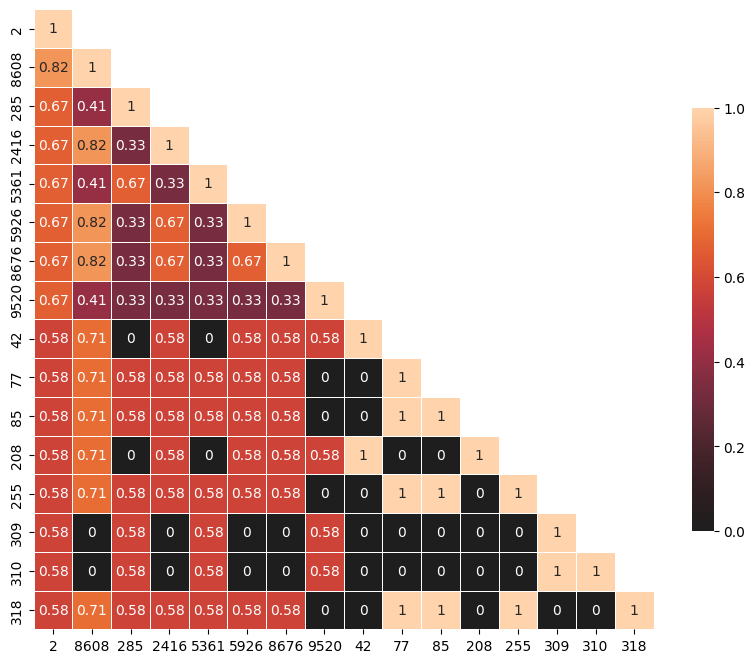

In [30]:
# Plot heatmap với mask để ẩn phần trên của heatmap
plt.figure(figsize=(10, 11))
sns.heatmap(similar_users_df, annot=True, mask=mask, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Matrix trên là dạng ma trận nửa dưới ứng với mỗi giá trị là sim-score của 2 user
- Càng lớn là càng gần giống
- Càng nhỏ là khá khác nhau

## Get recommended items

Và giờ chúng ta comeback lại transaction-table, chọn 5 user top cao điểm nhất

In [31]:
df_tech[df_tech['customer_id'].isin([2,8608,285, 2416, 5361,5926])][['customer_id', 'transaction_datetime', 'product_lvl4', 'rating']]

,customer_id,transaction_datetime,product_lvl4,rating
4,2,2022-12-16 03:40:11,Ốp lưng điện thoại iPhone Silicone,4.7
8,2,2022-12-16 03:40:11,Máy quay phim 4K Panasonic Lumix GH5,4.9
9,2,2022-12-16 03:40:11,iPad Pro,4.9
529,285,2022-03-17 23:42:11,Máy quay phim 4K Panasonic Lumix GH5,4.9
530,285,2022-03-17 23:42:11,iPad Pro,4.9
531,285,2022-03-17 23:42:11,Sony Alpha A7III,3.5
4597,2416,2020-09-08 22:01:44,Lò vi sóng nướng Panasonic,4.6
4599,2416,2020-09-08 22:01:44,Ốp lưng điện thoại iPhone Silicone,4.7
4607,2416,2020-09-08 22:01:44,Lò vi sóng nướng Panasonic,4.6
4608,2416,2020-09-08 22:01:44,Máy quay phim 4K Panasonic Lumix GH5,4.9


Trong đó:
- **Customer-id 2**: mua Ốp lưng điện thoại Iphone Silicone, Máy quay phim 4K, Panasonic Lumix GH5 và IPad Pro

- **Customer_id 285**: mua Máy quay phim 4K Panasonic Lumix GH5, iPad Pro, Sony Alpha A7III

- **Customer_id 2416**: mua Lò vi sóng nướng Panasonic, Ốp lưng điện thoại iPhone Silicone, Máy quay phim 4K Panasonic Lumix GH5	

- **Customer_id 5361** iPad Pro, Máy quay phim 4K Panasonic Lumix GH5, Máy ảnh du lịch Sony Alpha a6400	

- **Customer_id 5926**: iPhone 13 Pro, Ốp lưng điện thoại iPhone Silicone, Máy quay phim 4K Panasonic Lumix GH5

- **Customer_id 8608**: Ốp lưng điện thoại iPhone Silicone, Máy quay phim 4K Panasonic Lumix GH5

In [32]:
# Lấy những sản phẩm mà customer-id 2 đã mua
item_ci2_bought = set(df_tech[df_tech['customer_id'] == 2]['product_lvl4'].tolist())
item_ci2_bought

{'Máy quay phim 4K Panasonic Lumix GH5',
 'iPad Pro',
 'Ốp lưng điện thoại iPhone Silicone'}

In [33]:
# Lấy những sản phẩm mà 4 KH giống nhất mua
item_sim_ci2 = set(df_tech[df_tech['customer_id'].isin([8608,285, 2416, 5361,5926])]['product_lvl4'].tolist())
item_sim_ci2

{'Lò vi sóng nướng Panasonic',
 'Máy quay phim 4K Panasonic Lumix GH5',
 'Máy ảnh du lịch Sony Alpha a6400',
 'Sony Alpha A7III',
 'iPad Pro',
 'iPhone 13 Pro',
 'Ốp lưng điện thoại iPhone Silicone'}

In [34]:
# Filter ra những sản phẩm mà customer-id 2 chưa mưa
item_ci2_notyet = list(item_sim_ci2 - item_ci2_bought)
item_ci2_notyet

['Sony Alpha A7III',
 'Lò vi sóng nướng Panasonic',
 'Máy ảnh du lịch Sony Alpha a6400',
 'iPhone 13 Pro']

In [35]:
df_tech[df_tech['customer_id'].isin([8608,285, 2416, 5361,5926])][['product_lvl4', 'rating']].value_counts()

product_lvl4                          rating
Máy quay phim 4K Panasonic Lumix GH5  4.9       5
Ốp lưng điện thoại iPhone Silicone    4.7       3
Lò vi sóng nướng Panasonic            4.6       2
iPad Pro                              4.9       2
Máy ảnh du lịch Sony Alpha a6400      3.9       1
Sony Alpha A7III                      3.5       1
iPhone 13 Pro                         4.8       1
Name: count, dtype: int64

Trong trường hợp này, có 4 sản phẩm chúng ta có thể recommend cho customer-id 2.

Chúng ta sẽ lookup for chất lượng sản phẩm của 4 items này, có 668 transaction cho 4 sản phẩm này

In [36]:
x = df[df['product_lvl4'].isin(item_ci2_notyet)]
x

,transaction_id,transaction_datetime,customer_id,product_id,product_lvl1,product_lvl2,product_lvl3,product_lvl4,brand,price,...,rating,num_sold,quantity,unit_price,total_amount,payment_id,promotion_id,transaction_status,transaction_type,store_id
22,21.0,2022-11-25 07:18:57,8,52,Thương mại điện tử,Máy ảnh,Máy ảnh mirrorless,Sony Alpha A7III,Sony,33000000,...,3.5,71,0,33000000,0,7.0,NaN,Đã xác nhận,Mua hàng,8587
25,24.0,2018-10-03 06:32:45,9,6,Thương mại điện tử,Điện thoại di động,Điện thoại iPhone,iPhone 13 Pro,Apple,33000000,...,4.9,1404,2,33000000,66000000,8.0,NaN,Đã giao hàng,Thanh toán trực tuyến,8711
31,30.0,2018-10-03 06:32:45,9,51,Máy ảnh và Máy quay phim,Máy ảnh du lịch,Máy ảnh du lịch Sony Alpha,Máy ảnh du lịch Sony Alpha a6400,Sony,17490000,...,3.9,1352,4,17490000,69960000,8.0,NaN,Đã giao hàng,Hoàn tiền,8187
34,33.0,2022-05-18 06:12:16,12,52,Thương mại điện tử,Máy ảnh,Máy ảnh mirrorless,Sony Alpha A7III,Sony,33000000,...,3.5,71,0,33000000,0,11.0,34.0,Thành công,Hoàn tiền,8039
44,43.0,2019-09-27 18:53:10,20,130,Điện thoại di động,Smartphone,iPhone,iPhone 13 Pro,Apple,26990000,...,4.8,85,1,26990000,26990000,19.0,44.0,Đã tiếp nhận,Thanh toán,8845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19013,17397.0,2021-11-23 04:33:02,9935,51,Máy ảnh và Máy quay phim,Máy ảnh du lịch,Máy ảnh du lịch Sony Alpha,Máy ảnh du lịch Sony Alpha a6400,Sony,17490000,...,3.9,1352,0,17490000,0,10875.0,19013.0,Đã tiếp nhận,Thanh toán,8212
19044,17425.0,2022-03-22 03:20:45,9952,33,Điện gia dụng,Lò vi sóng,Lò vi sóng nướng,Lò vi sóng nướng Panasonic,Panasonic,3690000,...,4.6,99,0,3690000,0,10894.0,NaN,Đã giao hàng,Mua hàng,8233
19122,17501.0,2020-08-16 21:10:28,9982,52,Thương mại điện tử,Máy ảnh,Máy ảnh mirrorless,Sony Alpha A7III,Sony,33000000,...,3.5,71,0,33000000,0,10926.0,19122.0,Đã giao hàng,Thanh toán trực tuyến,8721
19157,17536.0,2022-12-27 09:30:45,9993,33,Điện gia dụng,Lò vi sóng,Lò vi sóng nướng,Lò vi sóng nướng Panasonic,Panasonic,3690000,...,4.6,99,3,3690000,11070000,10937.0,19157.0,Đã hủy,Mua hàng,8227


Tổng hợp thông tin xung quanh về 2 product này, bao gồm:

- Trung bình rating
- Tổng số lượng đã được bán
- Tổng doanh thu bán được
- Số lượng store bán

In [39]:
df.loc[df['product_lvl4']=='Lò vi sóng nướng Panasonic']

,transaction_id,transaction_datetime,customer_id,product_id,product_lvl1,product_lvl2,product_lvl3,product_lvl4,brand,price,...,rating,num_sold,quantity,unit_price,total_amount,payment_id,promotion_id,transaction_status,transaction_type,store_id
141,129.0,2022-04-08 20:12:19,67,33,Điện gia dụng,Lò vi sóng,Lò vi sóng nướng,Lò vi sóng nướng Panasonic,Panasonic,3690000,...,4.6,99,0,3690000,0,71.0,NaN,Đã hoàn trả,Thẻ ghi nợ,8905
373,340.0,2022-12-15 14:57:06,194,33,Điện gia dụng,Lò vi sóng,Lò vi sóng nướng,Lò vi sóng nướng Panasonic,Panasonic,3690000,...,4.6,99,6,3690000,22140000,225.0,NaN,Đã giao hàng,Hoàn tiền,8904
439,396.0,2019-06-12 06:21:31,239,33,Điện gia dụng,Lò vi sóng,Lò vi sóng nướng,Lò vi sóng nướng Panasonic,Panasonic,3690000,...,4.6,99,0,3690000,0,272.0,NaN,Thành công,Thanh toán,8167
754,688.0,2022-11-11 23:50:33,406,33,Điện gia dụng,Lò vi sóng,Lò vi sóng nướng,Lò vi sóng nướng Panasonic,Panasonic,3690000,...,4.6,99,0,3690000,0,453.0,754.0,Đã hủy,Thẻ ghi nợ,8757
1047,956.0,2022-03-19 05:10:27,582,33,Điện gia dụng,Lò vi sóng,Lò vi sóng nướng,Lò vi sóng nướng Panasonic,Panasonic,3690000,...,4.6,99,15,3690000,55350000,641.0,1047.0,Đã tiếp nhận,Hoàn tiền,8760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18849,17239.0,2022-01-05 04:19:07,9869,33,Điện gia dụng,Lò vi sóng,Lò vi sóng nướng,Lò vi sóng nướng Panasonic,Panasonic,3690000,...,4.6,99,1,3690000,3690000,10806.0,NaN,Đã hủy,Thẻ ghi nợ,8646
18867,17256.0,2022-04-24 02:24:33,9878,33,Điện gia dụng,Lò vi sóng,Lò vi sóng nướng,Lò vi sóng nướng Panasonic,Panasonic,3690000,...,4.6,99,0,3690000,0,10814.0,NaN,Đã hủy,Thẻ ghi nợ,8807
18961,17347.0,2018-03-26 08:55:42,9920,33,Điện gia dụng,Lò vi sóng,Lò vi sóng nướng,Lò vi sóng nướng Panasonic,Panasonic,3690000,...,4.6,99,1,3690000,3690000,10858.0,NaN,Đã giao hàng,Thanh toán,8118
19044,17425.0,2022-03-22 03:20:45,9952,33,Điện gia dụng,Lò vi sóng,Lò vi sóng nướng,Lò vi sóng nướng Panasonic,Panasonic,3690000,...,4.6,99,0,3690000,0,10894.0,NaN,Đã giao hàng,Mua hàng,8233


In [43]:
recommend_item = x.groupby('product_lvl4').agg({'rating': 'mean', 'quantity': 'sum', 'total_amount': 'sum', 'store_id': 'nunique'})
recommend_item.columns = ['mean_rating', 'total_num_sold', 'revenue', 'num_store_sold']
recommend_item

,mean_rating,total_num_sold,revenue,num_store_sold
product_lvl4,,,,
Lò vi sóng nướng Panasonic,4.600000,514,1896660000,125
Máy ảnh du lịch Sony Alpha a6400,3.900000,602,10528980000,128
Sony Alpha A7III,3.500000,519,17127000000,132
iPhone 13 Pro,4.848077,1086,32310130000,237


Ở đây ta có thể chọn lò Vi sóng nướng PanaSonic và iphone 13 Pro để recommend cho user 2